# Naive Bayes Categorical - part 2

The following notebook, found in the Blackboard course site, fixes the bug that was present in the notebook from the previous thread:

Naive_Bayes_categorical_sklearn_part_2.ipynb

After the bug is fixed, you will see that besides the computation of the train and validation accuracy, there is also use of an option of Naive Bayes, which allows us to obtain probabilities (confidence) from the trained model, and not just predictions. In other words, the model can output that for a given instance, the prediction is "1" with confidence 0.8 (for example). This is done using the "predict_proba" method, see here:

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.CategoricalNB.html#sklearn.naive_bayes.CategoricalNB

Using the predictions and the predicted probabilities of the test set, you will see in the notebook computation of the following evaluation metrics:

Classification Accuracy

confusion matrix

ROC curve

Area under the ROC curve (AUC).

All these concepts were explained in the class on "evaluation metrics".

Please execute the cells of the notebook, and make sure you understand what is computed. Below are some more resources to help you understand.

Slightly more Advanced: After you understand what is going on, try to play with various parameters, such as train/val sizes as well as a parameter called "alpha" of sklearn's Categorical Naive Bayes. This parameter controls the "Laplace smoothing" of the algorithm (Recall from class: Laplace smoothing adds a constant, in this case alpha, to each tally counting appearance of each category in each feature.). See what happens as you vary alpha. In particular, what if alpha is really large? What happens to the predictions? The confusion matrix? The ROC curve? Can you explain?

Resources:

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
(see also wikipedia entry on ROC curve, included in the page)

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("automobile.csv", na_values = '?')

In [3]:
df.head(10)

,Unnamed: 0,Normalized-losses,Make,Fuel-type,Aspiration,Num-of-doors,Body-style,Drive-wheels,Engine-location,Wheel-base,...,Fuel-system,Bore,Stroke,Compression-ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price,Risk
0,0,168.0,toyota,gas,std,two,sedan,rwd,front,94.5,...,2bbl,3.19,3.03,9.0,70.0,4800.0,29,34,8058.0,1
1,1,113.0,mazda,gas,std,four,sedan,fwd,front,93.1,...,2bbl,3.08,3.15,9.0,68.0,5000.0,31,38,7395.0,1
2,2,87.0,toyota,gas,std,two,hatchback,fwd,front,95.7,...,2bbl,3.05,3.03,9.0,62.0,4800.0,35,39,5348.0,1
3,3,125.0,mitsubishi,gas,std,four,sedan,fwd,front,96.3,...,2bbl,3.35,3.46,8.5,88.0,5000.0,25,32,6989.0,1
4,4,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0,1
5,5,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,11845.0,3
6,6,194.0,nissan,gas,turbo,two,hatchback,rwd,front,91.3,...,mpfi,3.43,3.27,7.8,200.0,5200.0,17,23,19699.0,3
7,7,NaN,jaguar,gas,std,two,sedan,rwd,front,102.0,...,mpfi,3.54,2.76,11.5,262.0,5000.0,13,17,36000.0,0
8,8,128.0,nissan,gas,std,four,sedan,fwd,front,100.4,...,mpfi,3.43,3.27,9.0,152.0,5200.0,17,22,13499.0,0
9,9,161.0,peugot,diesel,turbo,four,sedan,rwd,front,107.9,...,idi,3.70,3.52,21.0,95.0,4150.0,28,33,16900.0,0


In [4]:
df.describe(include="all")

,Unnamed: 0,Normalized-losses,Make,Fuel-type,Aspiration,Num-of-doors,Body-style,Drive-wheels,Engine-location,Wheel-base,...,Fuel-system,Bore,Stroke,Compression-ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price,Risk
count,205.000000,164.000000,205,205,205,203,205,205,205,205.000000,...,205,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000,205.000000
unique,NaN,NaN,22,2,2,2,5,3,2,NaN,...,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,...,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,185,168,114,96,120,202,NaN,...,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,102.000000,122.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,NaN,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353,0.834146
std,59.322565,35.442168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,NaN,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342,1.245307
min,0.000000,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,-2.000000
25%,51.000000,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,0.000000
50%,102.000000,115.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000,1.000000
75%,153.000000,150.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,NaN,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,2.000000


In [5]:
# Let's see the types of the columns
df.dtypes

Unnamed: 0             int64
Normalized-losses    float64
Make                  object
Fuel-type             object
Aspiration            object
Num-of-doors          object
Body-style            object
Drive-wheels          object
Engine-location       object
Wheel-base           float64
Length               float64
Width                float64
Height               float64
Curb-weight            int64
Engine-type           object
Num-of-cylinders      object
Engine-size            int64
Fuel-system           object
Bore                 float64
Stroke               float64
Compression-ratio    float64
Horsepower           float64
Peak-rpm             float64
City-mpg               int64
Highway-mpg            int64
Price                float64
Risk                   int64
dtype: object

Target variable is Risk, ranging from -2 to 3.  For this notebook, we will covert it to "0" for (-2,-1,0) and "1" for (1,2,3)

<AxesSubplot:>

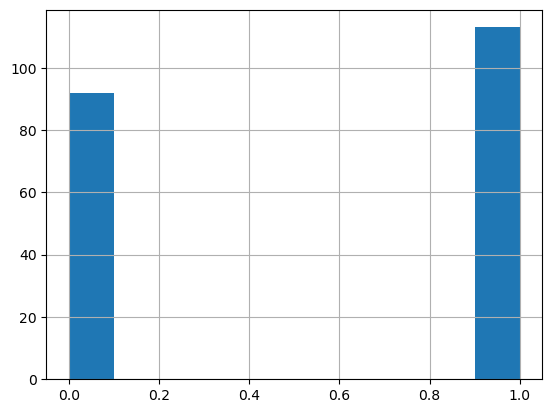

In [6]:
df["Risk"] = df["Risk"].apply(lambda x: 0 if x<=0 else 1)
df["Risk"].hist()

Let's keep only the categoricals.

In [7]:
# Take only categoricals
from pandas.api.types import is_numeric_dtype
categoricals = [c for c in df.columns if ((not is_numeric_dtype(df[c])) or c=='Risk')]
df_cat = df[categoricals].astype(str).astype('category')

For Pandas categoricals, a missing value is not a category, it is just a missing value.

Let's replace the missing values with a new category "zzz".  This way, we are using the information that a value is missing as a category by itself.  As we discussed in class, this may be useful, especially if values are missing "not at random".

In [8]:
def add_dummy_category(series):
  series = series.cat.add_categories(['zzz'])
  series = series.fillna('zzz')
  return series

In [9]:
for c in df_cat.columns: df_cat[c] = add_dummy_category(df_cat[c])

In [10]:
from sklearn.naive_bayes import CategoricalNB #Naive Bayes (categorical)
from sklearn.model_selection import train_test_split

In [11]:
# In the part 1 of the notebook, there was some code here that
# crashed because sklearn's CategoricalNB must have the categories
# encoded as integers.


In [12]:
def categorical_to_int(series):
  categories = series.cat.categories
  categories = categories.sort_values()
  return series.replace(to_replace = categories, value = range(len(categories))).astype('string').astype('int32')

# see what happens if you try to convert to int32 without first converting to string...


In [13]:
for c in df_cat.columns: df_cat[c] = categorical_to_int(df_cat[c])


In [14]:
train, val = train_test_split(df_cat, train_size=0.7)
X_train = train.drop('Risk', axis=1)
y_train = train['Risk']
X_val = val.drop('Risk', axis=1)
y_val = val['Risk']

In the "part 1" version of this notebook, we tried to fit the classifier to the training data, but in some cases it crashed, because the validation data contained categories that did not appear in the training data.  This can be fixed with the "min_categories" parameter of the Naive Bayes "fit" (training) method, which instructs the algorithm to expect a minimum number of categories for each feature, even if the training data has fewer.

In [15]:
# number of categories for each feature is the maximal value of each feature
# (both in train set and in test set) plus 1.
min_categories = [
    max(X_train[c].max(), X_val[c].max()) + 1 for c in X_train.columns]

clf = CategoricalNB(min_categories = min_categories)

In [16]:
clf.fit(X_train, y_train)

CategoricalNB(min_categories=[22, 2, 2, 3, 5, 3, 2, 7, 7, 8])

In [17]:
clf.score(X_train, y_train) # check accuracy

0.8181818181818182

In [18]:
clf.score(X_val, y_val)

0.9193548387096774

There should be no crash now.  Run the last few cells (from the train/val split) a few times and verify this!

In [55]:
proba = clf.predict_proba(X_val)
print(proba[:10,:])

[[0.94181115 0.05818885]
 [0.33429332 0.66570668]
 [0.01277828 0.98722172]
 [0.00635506 0.99364494]
 [0.04564221 0.95435779]
 [0.92877738 0.07122262]
 [0.0494774  0.9505226 ]
 [0.71274904 0.28725096]
 [0.80657538 0.19342462]
 [0.98429762 0.01570238]]


The probabilities returned by predict_proba are given in a matrix with number of columns equalling the number of categories of the target variable, in our case 2 (remember that we converted the target variable to be either 0 or 1).  In what follows, we will use proba[:,1], namely, the probability of the "1" prediction for each instance.

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score

In [53]:
fpr, tpr, thresholds = roc_curve(y_val, proba[:,1])

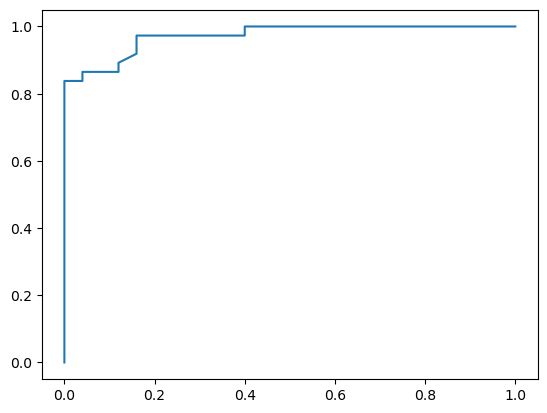

In [54]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, '-')

In [23]:
roc_auc_score(y_val, proba[:,1])

0.9724324324324325

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, clf.predict(X_val))

array([[21,  4],
       [ 1, 36]])

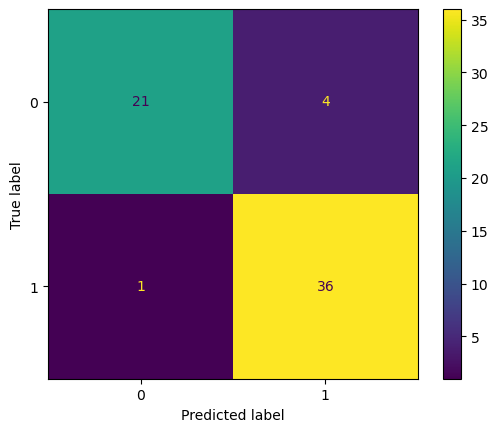

In [56]:
##JK: Plotting the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_pred = clf.predict(X_val)
cm = confusion_matrix(y_val, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [51]:
##JK: classification report to get more information
from sklearn.metrics import classification_report

y_val_pred = clf.predict(X_val)

print(
classification_report(y_val, y_val_pred, digits=5))

              precision    recall  f1-score   support

           0    0.95455   0.84000   0.89362        25
           1    0.90000   0.97297   0.93506        37

    accuracy                        0.91935        62
   macro avg    0.92727   0.90649   0.91434        62
weighted avg    0.92199   0.91935   0.91835        62



# GridSearchCV 

In [66]:
##JK: testing GridSearchCV to find the optimal Alpha

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Assuming you have your feature matrix X and target variable y

# Define the pipeline
pipeline = Pipeline([
    ('nb', CategoricalNB())
])

# Define the parameter grid to search
param_grid = {
    'nb__alpha': [0.001, 0.01, 0.1, 1.0, 10, 100,1000]  # Example alpha values to search
    # Add more alpha values as needed
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=4)

# Fit the model
grid_search.fit(X_train, y_train)

# Access the best estimator and best hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)


Best Hyperparameters:
{'nb__alpha': 0.001}


/Users/jonykraayenbrink/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/jonykraayenbrink/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/jonykraayenbrink/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/jonykraayenbrink/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "/Users/jonykraayenbrink/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 711, in score
    return self.steps[-1][1].score(Xt, y, **score_params)

## Testing various Alpha 

As a reminder: Laplace smoothing is pretending that for each categorical feature x_i, and each possible category value c, we pretend to have observed x_i taking value c, alpha times, before we ever saw the training data. 

In class I just talked about alpha=1 ("pretend that everything that is possible was seen once before training started"), but there is no reason not to take alpha=1000, or, as Omar did, close to 0. 

Taking alpha=0 (no smoothing...) is problematic because it creates complete certainty that some values are not possible, and if these values end up appearing in the test set, then things will crash for numerical reasons.

In [110]:
## looping over the different Alpha and calculating accuracy and ROC AUC score for different training and testing dataset sizes
alpha_ranges = [0.01, 0.1, 1.0, 10, 100,1000, 10000]
alpha=[]

accuracy_training =[]
accuracy_testing = []

test_size = []
train_size =[]

roc_train_scores = []
roc_test_scores =[]

X = df_cat.drop('Risk', axis=1)
y= df_cat['Risk']

min_categories = [
    max(X_train[c].max(), X_val[c].max()) + 1 for c in X_train.columns]

## iterating 100 times
for i in range(0,100):

## iterating over a list of alpha values    
    for alpha_val in alpha_ranges:

## iterating over a list of testing values
           for val in [0.3, 0.5]:
                X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=val)

## min_number of categories for the CategoricalNB model
                min_categories = [
    max(X_train[c].max(), X_test[c].max()) + 1 for c in X_train.columns]

#fitting the model with the training set
                clf = CategoricalNB(min_categories=min_categories, alpha=alpha_val)
                clf.fit(X_train, y_train)
        
## scoring the training set        
                accuracy_score_train = clf.score(X_train, y_train)
                proba_train = clf.predict_proba(X_train)
                roc_train = roc_auc_score(y_train, proba_train[:,1])

### scoring on the testing/validation set                  
                accuracy_score_test = clf.score(X_test, y_test)
                proba_test = clf.predict_proba(X_test)
                roc_test = roc_auc_score(y_test, proba_test[:,1])
    

### appending all returned values
                accuracy_training.append(accuracy_score_train)
                accuracy_testing.append(accuracy_score_test)
                test_size.append(val)
                train_size.append(1-val)
                alpha.append(alpha_val)
                roc_train_scores.append(roc_train)
                roc_test_scores.append(roc_test)

            
    

In [111]:
##creating a df with all results
d = {'alpha':alpha, 'accuracy_train':accuracy_training, 'accuracy_test':accuracy_testing, 'roc_score_train':roc_train_scores, 'roc_test_scores':roc_test_scores,'train_size':train_size, 'test_size':test_size}
df_results = pd.DataFrame(d )
df_results.head()

,alpha,accuracy_train,accuracy_test,roc_score_train,roc_test_scores,train_size,test_size
0,0.01,0.860140,0.854839,0.947465,0.919118,0.7,0.3
1,0.01,0.941176,0.805825,0.971199,0.881629,0.5,0.5
2,0.10,0.839161,0.822581,0.940299,0.887568,0.7,0.3
3,0.10,0.862745,0.854369,0.929594,0.908621,0.5,0.5
4,1.00,0.902098,0.741935,0.973870,0.807210,0.7,0.3


In [112]:
### getting the averages for the accuracy and ROC scores
df_results_avg = df_results.groupby(by=['alpha','train_size'], as_index=False).agg({'accuracy_train':'mean', 'accuracy_test':'mean', 'roc_score_train':'mean', 'roc_test_scores':'mean'})
df_results_avg


,alpha,train_size,accuracy_train,accuracy_test,roc_score_train,roc_test_scores
0,0.01,0.5,0.892745,0.801262,0.961212,0.880980
1,0.01,0.7,0.881329,0.800645,0.953972,0.877922
2,0.10,0.5,0.885686,0.810971,0.956810,0.893127
3,0.10,0.7,0.876503,0.820000,0.949554,0.900363
4,1.00,0.5,0.869314,0.816408,0.942944,0.903021
5,1.00,0.7,0.870839,0.830645,0.940573,0.911650
6,10.00,0.5,0.838235,0.793786,0.925725,0.895520
7,10.00,0.7,0.840979,0.810484,0.924518,0.902022
8,100.00,0.5,0.742549,0.698350,0.913427,0.890420
9,100.00,0.7,0.751259,0.718065,0.910491,0.897768


In [134]:
describe = df_results_avg.drop(columns=['alpha','train_size'], axis=1).describe()

describe.loc[['mean', 'std', 'min', 'max']]

,accuracy_train,accuracy_test,roc_score_train,roc_test_scores
mean,0.767015,0.722349,0.929257,0.893790
std,0.135997,0.117378,0.020876,0.008953
min,0.555594,0.538641,0.904294,0.877922
max,0.892745,0.830645,0.961212,0.911650


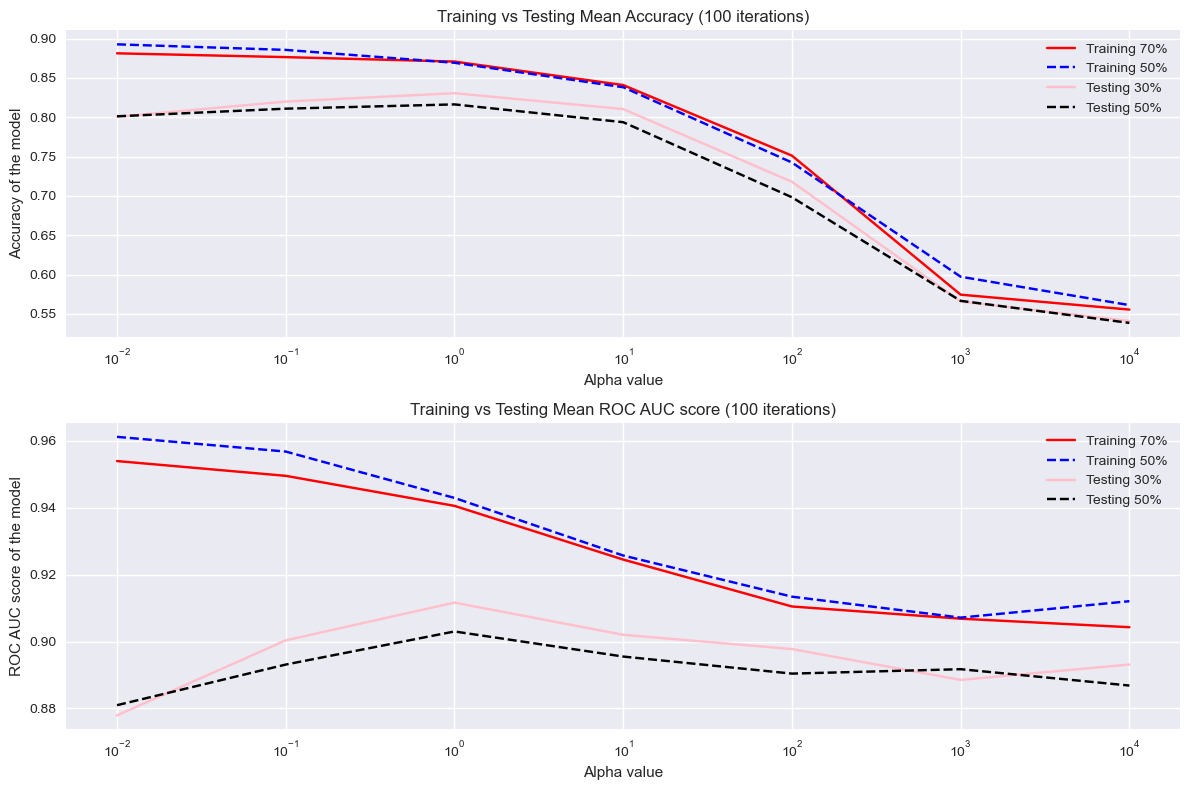

In [117]:
### Plotting
plt.style.use('seaborn')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))


#training vs testing accuracy
ax1.plot( df_results_avg['alpha'].unique(), df_results_avg[df_results_avg['train_size']==0.7].accuracy_train, color='red', label='Training 70%', linestyle='-')
ax1.plot( df_results_avg['alpha'].unique(), df_results_avg[df_results_avg['train_size']==0.5].accuracy_train, color='blue', label='Training 50%', linestyle='--')
ax1.plot( df_results_avg['alpha'].unique(), df_results_avg[df_results_avg['train_size']==0.7].accuracy_test, color='pink', label='Testing 30%', linestyle='-')
ax1.plot( df_results_avg['alpha'].unique(), df_results_avg[df_results_avg['train_size']==0.5].accuracy_test, color='black', label='Testing 50%', linestyle='--')

ax1.set_title('Training vs Testing Mean Accuracy (100 iterations)')  # Use set_title instead of title
ax1.set_ylabel('Accuracy of the model')  # Use set_ylabel instead of ylabel
ax1.set_xlabel('Alpha value')  # Use set_xlabel instead of xlabel
ax1.set_xticks(alpha_ranges)  # Use set_xticks instead of xticks
ax1.legend()
ax1.set_xscale('log')
#ax1.set_xticklabels([str(x) for x in alpha_ranges])

#training vs testing roc_curve
ax2.plot( df_results_avg['alpha'].unique(), df_results_avg[df_results_avg['train_size']==0.7].roc_score_train, color='red', label='Training 70%', linestyle='-')
ax2.plot( df_results_avg['alpha'].unique(), df_results_avg[df_results_avg['train_size']==0.5].roc_score_train, color='blue', label='Training 50%', linestyle='--')
ax2.plot( df_results_avg['alpha'].unique(), df_results_avg[df_results_avg['train_size']==0.7].roc_test_scores, color='pink', label='Testing 30%', linestyle='-')
ax2.plot( df_results_avg['alpha'].unique(), df_results_avg[df_results_avg['train_size']==0.5].roc_test_scores, color='black', label='Testing 50%', linestyle='--')

ax2.set_title('Training vs Testing Mean ROC AUC score (100 iterations)')  # Use set_title instead of title
ax2.set_ylabel('ROC AUC score of the model')  # Use set_ylabel instead of ylabel
ax2.set_xlabel('Alpha value')  # Use set_xlabel instead of xlabel
ax2.set_xticks(alpha_ranges)  # Use set_xticks instead of xticks
ax2.legend()
ax2.set_xscale('log')


plt.tight_layout()
plt.show()
